# Samples of how all data and figures were generated.
For brevity, not all figure panels are shown here. Schematics and formatted figures were created in powerpoint. 
Due to updates and changes to code over the course of the project images such as the heatmaps and histograms (like in figure 3) may appear slightly different due to color changes.

In [1]:
#For Calculations
import numpy as np
import numpy.linalg as la
import numpy.ma as ma
import scipy as scp
from scipy import optimize
from scipy.linalg import expm
import scipy.integrate as integrate
from scipy import signal
from scipy.special import erf

#For Plotting results and Figures
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.ticker as tick
import matplotlib as mpl

#For histograms
from scipy.stats import norm

#Progress Bars
from tqdm.notebook import tqdm

#Parallel computing for center simulations/predictions
from joblib import Parallel, delayed

#Random number generation for noise
from numpy.random import default_rng
rng = default_rng()

In [2]:
#All functions created for this manuscript
import Functions_STP_multiscale as stpfun

In [3]:
#Setting Defaults For Plotting
#Setting Fontsizes
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)   # fontsize of the figure title
#Setting Linewidths
plt.rc('lines', linewidth=6.0)

In [4]:
#Define possible perturbation signs. Needed for instability analysis.
possible_signs=np.array([[-1,-1,-1,-1],
                         [-1,-1,-1,1],
                         [-1,-1,1,-1],
                         [-1,1,-1,-1],
                         [1,-1,-1,-1],
                         [-1,-1,1,1],
                         [-1,1,-1,1],
                         [-1,1,1,-1],
                         [1,-1,1,-1],
                         [1,1,-1,-1],
                         [1,-1,-1,1],
                         [-1,1,1,1],
                         [1,-1,1,1],
                         [1,1,-1,1],
                         [1,1,1,-1],
                         [1,1,1,1]])

# Stationary Solution Samples

Immediately below is a sample of how parameters were defined. Wherever possible, variable names were defined to match the conventions in the manuscript.

In [5]:
#Setting Parameters

#FixedParams always refers to setting the 
#synaptic weight profile parameters and timeconstants
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

#PlasticParams defines the plasticity paramaters
PlasticParams={
    'qe0': 2,
    'qi0': 1,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.001,
    'alpha_i': 0.1
}
#Spatial vectors, firing thresholds

dx=0.005                   
x=np.arange(-10,10+dx,dx)
xdim=len(x)

th_e=0.4
th_i=0.35


In [6]:
#Throughout we focus on broad stationary solutions where both E and I active
InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)
Ue0=InitialProfiles['Ue0']
Ui0=InitialProfiles['Ui0']

#For completeness we can also seek narrow solutions where E is active and I is inactive
#these solutions tend to be unstable
NarrowInitialProfiles=stpfun.narrow_stationary_solutions(x,0.5,th_e,th_i,**FixedParams,**PlasticParams)
Ue0N=NarrowInitialProfiles['Ue0']
Ui0N=NarrowInitialProfiles['Ui0']



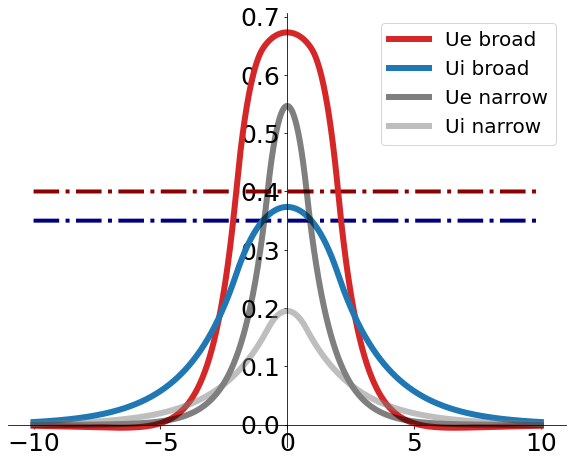

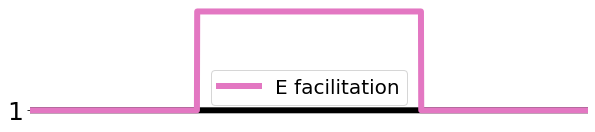

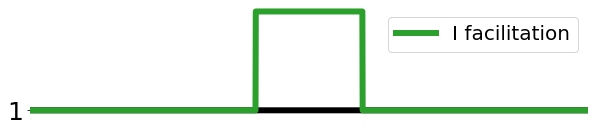

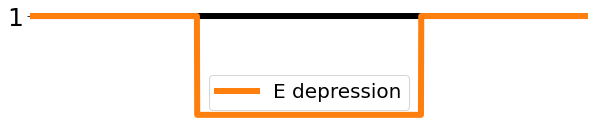

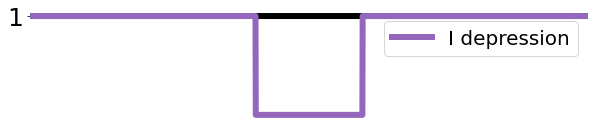

In [7]:
#######
#
#Plotting sample of stationary profiles
#
#######

#activity profiles
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left') 
ax.plot(x,np.ones(len(x))*th_e,'-.',color='darkred',linewidth=4)
ax.plot(x,np.ones(len(x))*th_i,'-.',color='navy',linewidth=4)
ax.plot(x,Ue0,color='tab:red',label='Ue broad')
ax.plot(x,Ui0,color='tab:blue',label='Ui broad')

ax.plot(x,Ue0N,color='k',label='Ue narrow',alpha=0.5)
ax.plot(x,Ui0N,color='tab:grey',label='Ui narrow',alpha=0.5)
plt.legend()

#plasticity profiles
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,InitialProfiles['Qe0']+np.ones(len(x)),color='tab:pink',label='E facilitation')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,InitialProfiles['Qi0']+np.ones(len(x)),color='tab:green',label='I facilitation')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,InitialProfiles['Re0'],color='tab:orange',label='E depression')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,InitialProfiles['Ri0'],color='tab:purple',label='I depression')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

# Sample wandering bumps

In [8]:
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 1,
    'qi0': 1,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.003,
    'alpha_i': 0.1
}

#Spatial vectors, firing thresholds, noise level, and temporal parameters are defined here
dx=0.005 #spatial step                 
x=np.arange(-10,10+dx,dx) #spatial vector
xdim=len(x)


th_e=0.4
th_i=0.35
eps=0.001 #noise parameter. If zero then there is no noise.

T=1000 #time end
dt=.1 #time step
nt=int(np.round(T/dt)+1) #number of time steps

#finding the broad stationary solutions. The bumps were initialized using these.
InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)


In [9]:
#Running a single simulation with noise
Result=stpfun.single_simulation_allFrames(x,th_e,th_i,eps,dt,nt,**FixedParams,**PlasticParams,**InitialProfiles)

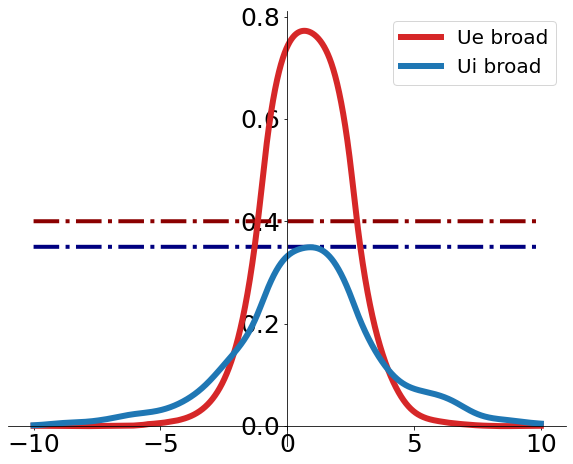

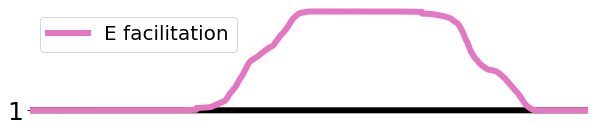

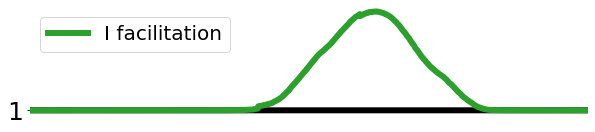

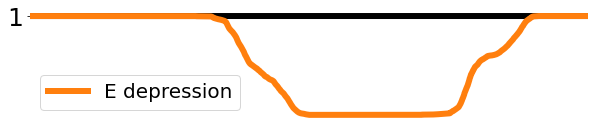

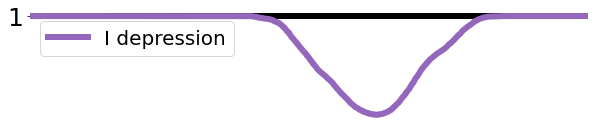

In [10]:
#######
#
#Plotting sample of the final profiles of wandering bumps and plasticity profiles
#
#######

#activity profiles
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left') 
ax.plot(x,np.ones(len(x))*th_e,'-.',color='darkred',linewidth=4)
ax.plot(x,np.ones(len(x))*th_i,'-.',color='navy',linewidth=4)
ax.plot(x,Result[0][:,-1],color='tab:red',label='Ue broad')
ax.plot(x,Result[1][:,-1],color='tab:blue',label='Ui broad')
plt.legend()

#plasticity profiles
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,Result[2][:,-1]+np.ones(len(x)),color='tab:pink',label='E facilitation')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,Result[3][:,-1]+np.ones(len(x)),color='tab:green',label='I facilitation')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,Result[4][:,-1],color='tab:orange',label='E depression')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,Result[5][:,-1],color='tab:purple',label='I depression')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

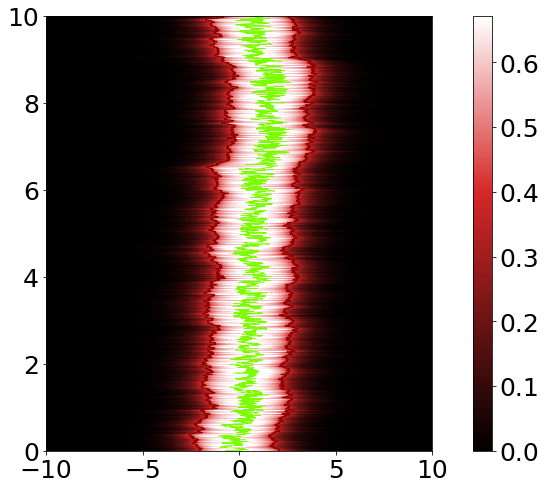

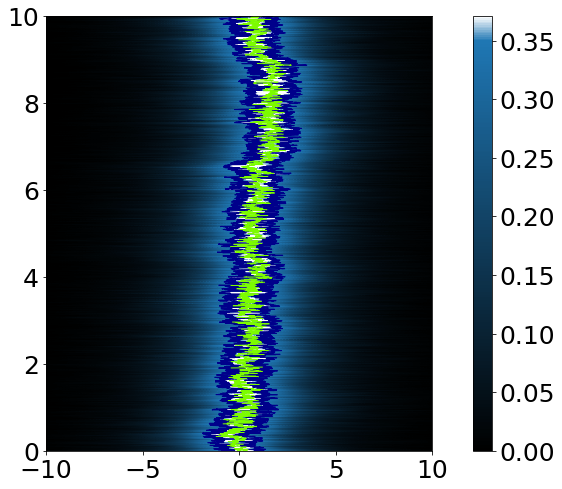

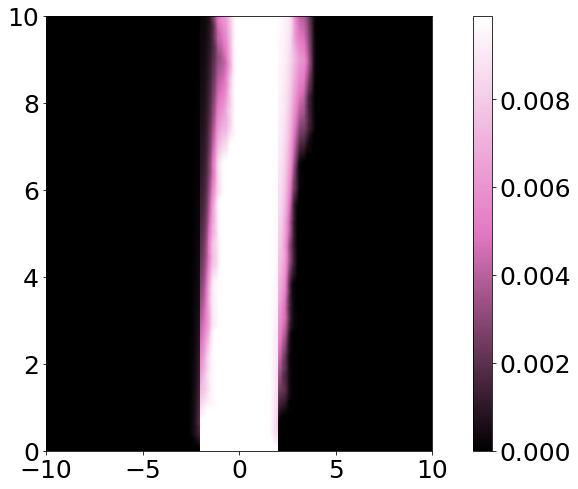

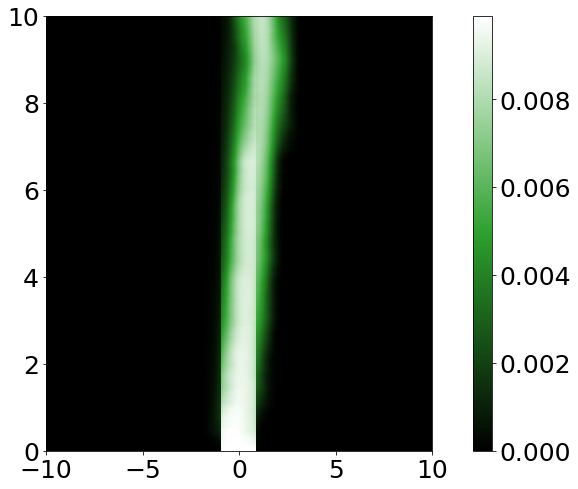

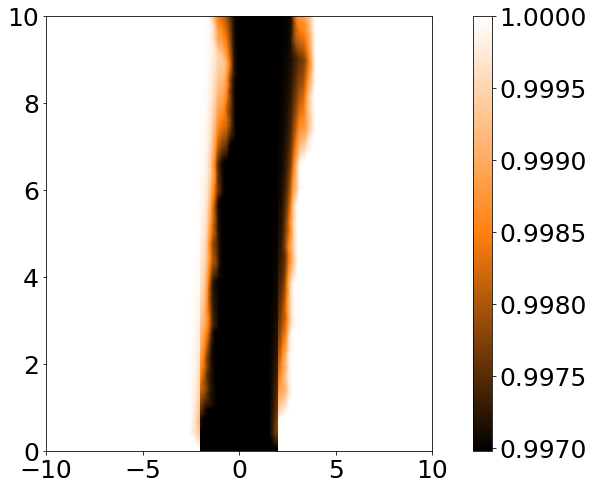

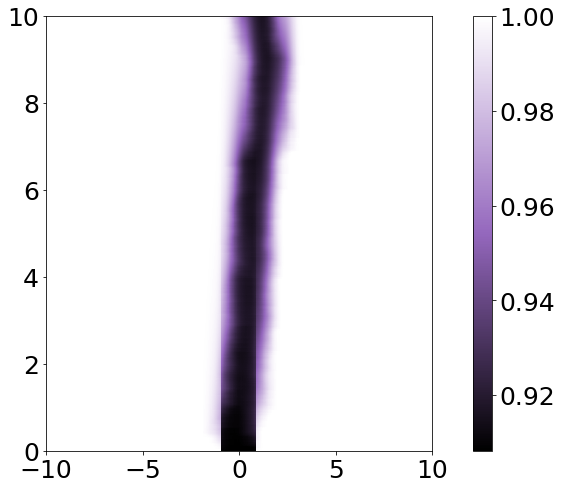

In [11]:
#######
#
#Plotting heatmaps of the wandering bumps and plasticity variables over time
#
#######


cemap = colors.LinearSegmentedColormap.from_list("", ["black","tab:red","white"])
cimap = colors.LinearSegmentedColormap.from_list("", ["black","tab:blue","white"])
cqemap = colors.LinearSegmentedColormap.from_list("", ["black","tab:pink","white"])
cqimap = colors.LinearSegmentedColormap.from_list("", ["black","tab:green","white"])
cremap = colors.LinearSegmentedColormap.from_list("", ["black","tab:orange","white"])
crimap = colors.LinearSegmentedColormap.from_list("", ["black","tab:purple","white"])
divnorme=colors.TwoSlopeNorm(vmin=0, vcenter=th_e, vmax=max(InitialProfiles['Ue0']))
divnormi=colors.TwoSlopeNorm(vmin=0, vcenter=th_i, vmax=max(InitialProfiles['Ui0']))
divnormqe=colors.TwoSlopeNorm(vmin=0, vcenter=max(InitialProfiles['Qe0'])/2, vmax=max(InitialProfiles['Qe0']))
divnormqi=colors.TwoSlopeNorm(vmin=0, vcenter=max(InitialProfiles['Qi0'])/2, vmax=max(InitialProfiles['Qi0']))
divnormre=colors.TwoSlopeNorm(vmin=min(InitialProfiles['Re0']), 
                              vcenter=0.5*(min(InitialProfiles['Re0'])+max(InitialProfiles['Re0'])), 
                              vmax=max(InitialProfiles['Re0']))
divnormri=colors.TwoSlopeNorm(vmin=min(InitialProfiles['Ri0']), 
                              vcenter=0.5*(min(InitialProfiles['Ri0'])+max(InitialProfiles['Ri0'])), 
                              vmax=max(InitialProfiles['Ri0']))
timey=np.linspace(0,T,nt)/100

#Sometimes one must skip every few frames
#because the colormesh plots come back blank sometimes 
#(I hazard a guess that too many rows breaks it a little)
skip=2
X, Y = np.meshgrid(x, timey[::skip], indexing='ij')

#Neural Activity
fig, (ax, cax) = plt.subplots(ncols=2,figsize=(8,8), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[0][:,::skip],norm=divnorme,cmap=cemap,shading='auto')
ax.contour(X, Y, Result[0][:,::skip], levels=[th_e], colors=['darkred'], linewidths=1)
ax.plot(x[np.argmax(Result[0],axis=0)],timey,'lawngreen',linewidth=0.5)
fig.colorbar(im, cax=cax)

plt.show()

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(8,8), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[1][:,::skip],norm=divnormi,cmap=cimap,shading='auto')
ax.contour(X, Y, Result[1][:,::skip], levels=[th_i], colors=['darkblue'], linewidths=1)
ax.plot(x[np.argmax(Result[1],axis=0)],timey,'lawngreen',linewidth=0.5)
fig.colorbar(im, cax=cax)

plt.show()

#Facilitation
fig, (ax, cax) = plt.subplots(ncols=2,figsize=(8,8), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[2][:,::skip],norm=divnormqe,cmap=cqemap,shading='auto')
fig.colorbar(im, cax=cax)

plt.show()

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(8,8), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[3][:,::skip],norm=divnormqi,cmap=cqimap,shading='auto')
fig.colorbar(im, cax=cax)

plt.show()


#Depression
fig, (ax, cax) = plt.subplots(ncols=2,figsize=(8,8), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[4][:,::skip],norm=divnormre,cmap=cremap,shading='auto')
fig.colorbar(im, cax=cax)

plt.show()

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(8,8), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[5][:,::skip],norm=divnormri,cmap=crimap,shading='auto')
fig.colorbar(im, cax=cax)

plt.show()

## NOTES
For brevity some more specialized single use functions are not included in this document for figures outlined below. A few alterations to the above single simulation code should allow for one to achieve similar plots if desired.

* A specialized form of this single simulation code was created to generate the single simulation panels in Figure 3 such that simulations with no plasticity, short term facilitation on E, and short term depression on E, would experience the same noise throughout to demonstrate the changes brought upon by short term plasticity alone. 

* Figure 7 utilized similar simulation code. 10,000 final profiles from single simulations were plotted of low transparency in black and were recentered and compared with eqs. 4.6. Additionally, the profiles throughout the simulation were also compared with results from eqs. 4.6 over time to confirm that they adequately approximate the behavior of the plasticity profiles. 

# Sample instabilities

Reproduces panels in figure 4 A.

## Oscillatory (see fig 4 A(left))

In [12]:
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 1,
    'qi0': 1,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.003,
    'alpha_i': 0.1
}


dx=0.005                   
x=np.arange(-3,3+dx,dx)
xdim=len(x)


th_e=0.2
th_i=0.1
eps=0

T=15
dt=.01
nt=int(np.round(T/dt)+1)



In [13]:
#Generating initial profiles and then applying a perturbation
InitialProfiles=stpfun.broad_stationary_solutions(x,[1,1],th_e,th_i,**FixedParams,**PlasticParams)
InitialProfiles['Ue0'],InitialProfiles['Ui0']=0.98*InitialProfiles['Ue0'],np.roll(InitialProfiles['Ui0'],0)
Result=stpfun.single_simulation_allFrames(x,th_e,th_i,eps,dt,nt,**FixedParams,**PlasticParams,**InitialProfiles)


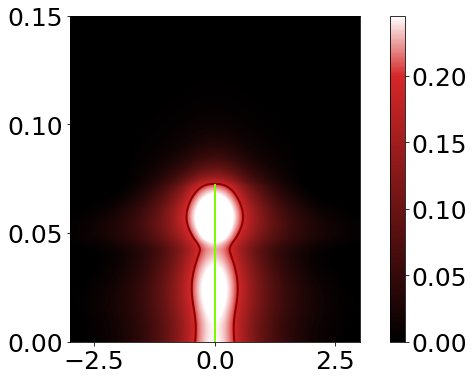

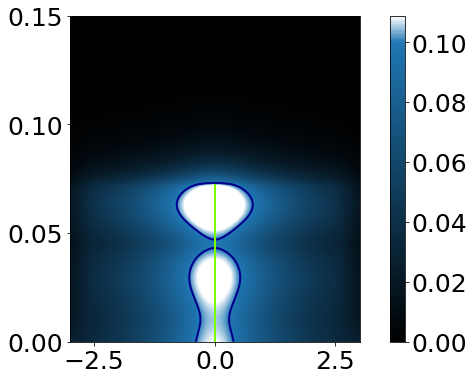

In [14]:
#######
#
#Plotting heatmaps of the oscillatory instability
#
#######
cemap = colors.LinearSegmentedColormap.from_list("", ["black","tab:red","white"])
cimap = colors.LinearSegmentedColormap.from_list("", ["black","tab:blue","white"])
divnorme=colors.TwoSlopeNorm(vmin=0, vcenter=th_e, vmax=max(InitialProfiles['Ue0']))
divnormi=colors.TwoSlopeNorm(vmin=0, vcenter=th_i, vmax=max(InitialProfiles['Ui0']))
timey=np.linspace(0,T,nt)/100
X, Y = np.meshgrid(x, timey, indexing='ij')

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(6,6), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[0],norm=divnorme,cmap=cemap,shading='auto')
ax.contour(X, Y, Result[0], levels=[th_e], colors=['darkred'], linewidths=2)
ax.plot(x[np.argmax(Result[0],axis=0)][0:720],timey[0:720],'lawngreen',linewidth=2)
fig.colorbar(im, cax=cax)

plt.show()

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(6,6), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[1],norm=divnormi,cmap=cimap,shading='auto')
ax.contour(X, Y, Result[1], levels=[th_i], colors=['darkblue'], linewidths=2)
ax.plot(x[np.argmax(Result[1],axis=0)][0:720],timey[0:720],'lawngreen',linewidth=2)
fig.colorbar(im, cax=cax)

plt.show()

## Drift Instability (see fig 4 A(right))

In [15]:
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 0,
    'qi0': 2,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.01,
    'alpha_i': 0
}

dx=0.005                   
x=np.arange(-10,10+dx,dx)
xdim=len(x)


th_e=0.2
th_i=0.25
eps=0
T=200
dt=.01
nt=int(np.round(T/dt)+1)



In [16]:
#Generating initial profiles and then applying a perturbation
InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)
InitialProfiles['Ue0'],InitialProfiles['Ui0']=InitialProfiles['Ue0'],np.roll(InitialProfiles['Ui0'],400)
Result=stpfun.single_simulation_allFrames(x,th_e,th_i,eps,dt,nt,**FixedParams,**PlasticParams,**InitialProfiles)

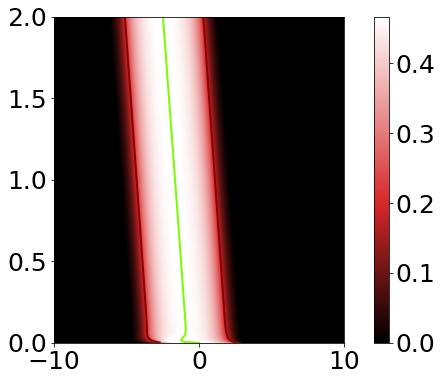

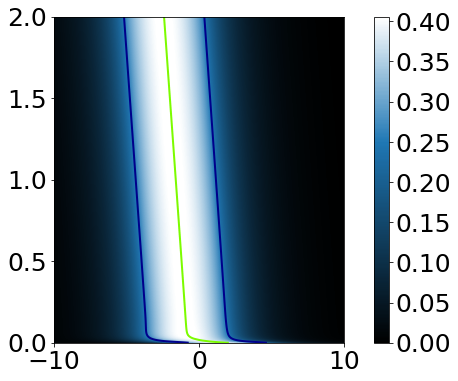

In [17]:
#######
#
#Plotting heatmaps of the drift instability
#
#######
cemap = colors.LinearSegmentedColormap.from_list("", ["black","tab:red","white"])
cimap = colors.LinearSegmentedColormap.from_list("", ["black","tab:blue","white"])
divnorme=colors.TwoSlopeNorm(vmin=0, vcenter=th_e, vmax=max(InitialProfiles['Ue0']))
divnormi=colors.TwoSlopeNorm(vmin=0, vcenter=th_i, vmax=max(InitialProfiles['Ui0']))
timey=np.linspace(0,T,nt)/100

#Sometimes one needs to skip every few frames
#because the colormesh plots come back blank sometimes 
#(I hazard a guess that too many rows breaks it a little)
skip=5 
X, Y = np.meshgrid(x, timey[::skip], indexing='ij')

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(6,6), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[0][:,::skip],norm=divnorme,cmap=cemap,shading='auto')
ax.contour(X, Y, Result[0][:,::skip], levels=[th_e], colors=['darkred'], linewidths=2)
ax.plot(x[np.argmax(Result[0],axis=0)],timey,'lawngreen',linewidth=2)
fig.colorbar(im, cax=cax)

plt.show()

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(6,6), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[1][:,::skip],norm=divnormi,cmap=cimap,shading='auto')
ax.contour(X, Y, Result[1][:,::skip], levels=[th_i], colors=['darkblue'], linewidths=2)
ax.plot(x[np.argmax(Result[1],axis=0)],timey,'lawngreen',linewidth=2)
fig.colorbar(im, cax=cax)

plt.show()

# Classifying Instabilities

In [18]:
#parameters for a region with an drift instabilities
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 1,
    'qi0': 1,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.003,
    'alpha_i': 0.1
}


dx=0.005                   
x=np.arange(-10,10+dx,dx)
xdim=len(x)

th_e=0.2
th_i=0.1

InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)


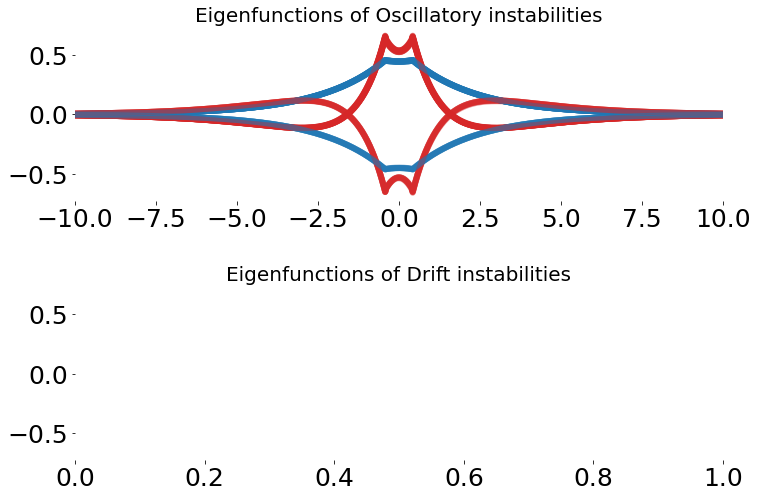

In [19]:
#counters to track number of drift and oscillatory instabilities
#Note: some perturbation cases can have both
#      for our purposes we classify the solution based on the maximal unstable eigenvalue
driftcounter=0
osccounter=0

#case instabilities tracks how many of the perturbation sign cases are unstable
#Max is 16. If any perturbation case is unstable the solution is classified as unstable.
caseinstability=0


#######
#
#Plotting perturbation profiles for all unstable eigenvalues.
#
#######
fig, (ax, ax1) = plt.subplots(2, 1, sharey=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.title.set_text('Eigenfunctions of Oscillatory instabilities')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.title.set_text('Eigenfunctions of Drift instabilities')
plt.subplots_adjust(left=0.5,
                    bottom=0.5,
                    right=2,
                    top=2,
                    wspace=0.5,
                    hspace=0.5)
for Signs in possible_signs:
    eigs=np.real(stpfun.Eigenvals('values',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
    vecs=np.real(stpfun.Eigenvals('vectors',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
    yn=stpfun.isStable(eigs)
    if yn==1:
        caseinstability+=1
        lamb,maxind = max((v,i) for i,v in enumerate(eigs))
        eigvec=vecs[:,maxind]
        if lamb>10**(-8):
            Ephi,Ipsi=stpfun.PerturbationProfiles(lamb,Signs,x,eigvec,**FixedParams,**PlasticParams,**InitialProfiles)
            dummy=stpfun.classifyInstability(Ephi,x)
            if dummy[0]=='oscillatory':
                osccounter+=1
                ax.plot(x,Ephi,color='tab:red',alpha=0.5)
                ax.plot(x,Ipsi,color='tab:blue',alpha=0.5)
                ax.set_xlim(-10,10)
#                 print("Perturbation sign case: ", Signs)
#                 print("\n The max unstable eigenvalue for the case is an ", dummy[0], " instability")
            if dummy[0]=='drift':
                driftcounter+=1
                ax1.plot(x,Ephi,color='tab:red',alpha=0.5)
                ax1.plot(x,Ipsi,color='tab:blue',alpha=0.5)
                ax1.set_xlim(-10,10)
#                 print("Perturbation sign case: ", Signs)
#                 print("\n The max unstable eigenvalue for the case is a " , dummy[0], " instability")

In [20]:
#parameters for a region with an drift instabilities
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 0,
    'qi0': 2,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.01,
    'alpha_i': 0
}

dx=0.005                   
x=np.arange(-10,10+dx,dx)
xdim=len(x)


th_e=0.2
th_i=0.25

InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)

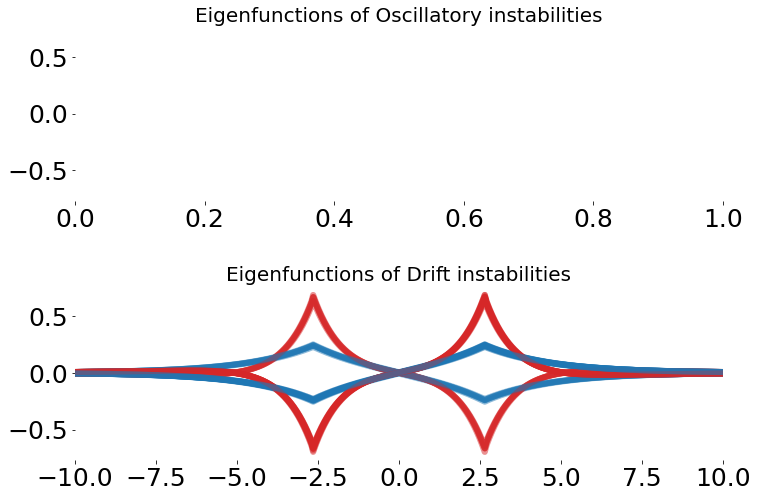

In [21]:
#counters to track number of drift and oscillatory instabilities
#Note: some perturbation cases can have both
#      for our purposes we classify the solution based on the maximal unstable eigenvalue
driftcounter=0
osccounter=0

#case instabilities tracks how many of the perturbation sign cases are unstable
#Max is 16. If any perturbation case is unstable the solution is classified as unstable.
caseinstability=0


#######
#
#Plotting perturbation profiles for all unstable eigenvalues.
#
#######
fig, (ax, ax1) = plt.subplots(2, 1, sharey=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.title.set_text('Eigenfunctions of Oscillatory instabilities')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.title.set_text('Eigenfunctions of Drift instabilities')
plt.subplots_adjust(left=0.5,
                    bottom=0.5,
                    right=2,
                    top=2,
                    wspace=0.5,
                    hspace=0.5)
for Signs in possible_signs:
    eigs=np.real(stpfun.Eigenvals('values',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
    vecs=np.real(stpfun.Eigenvals('vectors',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
    yn=stpfun.isStable(eigs)
    if yn==1:
        caseinstability+=1
        lamb,maxind = max((v,i) for i,v in enumerate(eigs))
        eigvec=vecs[:,maxind]
        if lamb>10**(-8):
            Ephi,Ipsi=stpfun.PerturbationProfiles(lamb,Signs,x,eigvec,**FixedParams,**PlasticParams,**InitialProfiles)
            dummy=stpfun.classifyInstability(Ephi,x)
            if dummy[0]=='oscillatory':
                osccounter+=1
                ax.plot(x,Ephi,color='tab:red',alpha=0.5)
                ax.plot(x,Ipsi,color='tab:blue',alpha=0.5)
                ax.set_xlim(-10,10)
#                 print("Perturbation sign case: ", Signs)
#                 print("\n The max unstable eigenvalue for the case is an ", dummy[0], " instability")
            if dummy[0]=='drift':
                driftcounter+=1
                ax1.plot(x,Ephi,color='tab:red',alpha=0.5)
                ax1.plot(x,Ipsi,color='tab:blue',alpha=0.5)
                ax1.set_xlim(-10,10)
#                 print("Perturbation sign case: ", Signs)
#                 print("\n The max unstable eigenvalue for the case is a " , dummy[0], " instability")


## Parameter slices

The following reproduces the subplot in the 4th row and 4th column of Fig 5.

In [22]:
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 0,
    'qi0': 0.6,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.005,
    'alpha_i': 0
}
#spatial vector
dx=0.001                   
x=np.arange(-12,12,dx)
xdim=len(x)


In [23]:
space=200 
axis1=np.linspace(0,0.7,space)
axis2=np.linspace(0,0.7,space)
stabmatrix=3*np.ones((space,space))
guess=[1,1]
for i, th_e in enumerate(tqdm(axis1)):
    for k,th_i in enumerate(axis2):
        InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)
        #Solutions that exist are classified via their stability
        if not np.isnan(InitialProfiles['ae']):
            for Signs in possible_signs:
                eigs=np.real(stpfun.Eigenvals('values',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
                vecs=np.real(stpfun.Eigenvals('vectors',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
                yn,lamb, evec=stpfun.isStable_vec(eigs,vecs)
                if yn==1:
                    Ephi,Ipsi=stpfun.PerturbationProfiles(lamb,Signs,x,evec,**FixedParams,**PlasticParams,**InitialProfiles)
                    Class,_=stpfun.classifyInstability(Ephi,x)
                    if Class=='oscillatory':
                        stabmatrix[i,k]=1
                    if Class=='drift':
                        stabmatrix[i,k]=2
                    break
        #Solutions that do not exist are assigned values of 0
        if np.isnan(InitialProfiles['ae']):
            stabmatrix[i,k]=0
        if (InitialProfiles['ae']>0.025)and(InitialProfiles['ai']>0.025):
            guess=[InitialProfiles['ae'],InitialProfiles['ai']]
            
#Note: Runtime warnings may arise for the cases where solutions cannot be found.
#large upper bounds within the stationary solution solver have been implemented 
#to avoid such errors.
#(regardless Runtime warnings should not affect the output and 
#np.nan will be returned either way).
 
#See above for how points of no solutions are classified.


  0%|          | 0/200 [00:00<?, ?it/s]

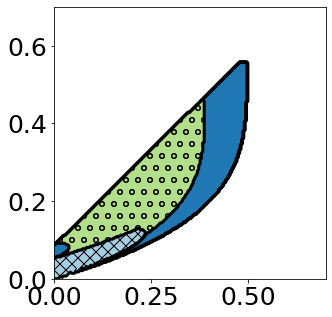

In [24]:
#######
#
#Plotting stability classification in a slice of parameter space
#
#######
X, Y = np.meshgrid(axis1, axis2, indexing='ij')

fig = plt.figure(figsize=(5, 5))

cmap = colors.ListedColormap(['white','#a6cee3','#b2df8a','#1f78b4'])
bounds = [0, 1,2, 3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(stabmatrix.T, interpolation = 'none',extent=[0, 0.7, 0, 0.7], cmap=cmap, norm=norm,origin='lower')
plt.contour(axis2,axis1,stabmatrix.T, levels=[0,1,2,3],
    colors=['k'],linewidths=3)
plt.contourf(axis2,axis1,stabmatrix.T,3,colors='none',hatches=['', 'xx','o',''],corner_mask=False)

# Simulating and calculating variances of wandering bumps
Reproduces the top panel of Figure 8 where all plasticity variables are active.

In [25]:
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 200,
    'tau_re': 150,
    'tau_ri': 100,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 1,
    'qi0': 0.8,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.003,
    'alpha_i': 0.1
}


dx=0.005                   
x=np.arange(-10,10+dx,dx)
xdim=len(x)


th_e=0.4
th_i=0.4
eps=0.001 #noise parameter.


# vector of sampling times
Svec1=np.arange(0,12,2)
Svec2=np.arange(25,95,25)
Svec3=np.arange(100,410,25)
SampleVec=np.hstack((Svec1,Svec2,Svec3))

T=SampleVec[-1] #End time 
dt=.025 #time step
nt=int(np.round(T/dt)+1) #number of timesteps

InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)


In [26]:
#defining a function for use in parallelizing the computation of full model simulations
#note: at this time I am fairly new to this so there likely are better ways to approach generating the 10,000 simulations
#the important function used to generate the 10,000 simulations is SampledCenters_simulation
def centersSims(_):
    return stpfun.SampledCenters_simulation(x, th_e, th_i, eps, dt, SampleVec,**FixedParams,**PlasticParams,**InitialProfiles) 


In [27]:
#defining a function for use in parallelizing the computation of lower dimensional model simulations
def centersPred(_):
    return stpfun.SampledCenter_predictions(x, th_e, th_i, eps, dt, SampleVec,**FixedParams,**PlasticParams,**InitialProfiles)

The following commented code generates the 10,000 simulations and writes the output to txt files in the location designated by the path parameter. Naming convention is (population abbreviation)+filename where the population abbreviation refers to CE, CI for the center of mass of E and I and CQE,CQI,CRE,CRI for the center of mass of each plasticity profile.


One can uncomment the following to run your own simulations if desired. A sample txt where 10,000 simulations for the topmost plot of variance simulations and predictions is provided. 

In [28]:
# filename="sample_sims"
# path=""

# #checks for stable solution and proceeds if stable
# if not np.isnan(InitialProfiles['ae']):
#     for Signs in possible_signs:
#         EC1=np.real(stpfun.Eigenvals('values',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
#         yn=stpfun.isStable(EC1)
#         if yn==1:
#             break
#     if yn!=1:
#         #Runs the simulations and writes the output in batches. 
#         #For this code every batch of 200 outputs is recorded. There are 50 batches, yielding 10,000 simulations.
#         for z in tqdm(range(20)):
#             Result=Parallel(n_jobs=-2)(delayed(centersSims)(_) for _ in tqdm(range(100)))
#             cevec,civec,cqevec,cqivec,crevec,crivec=np.hsplit(np.array(Result),6)
#             with open(path+"CE"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, cevec, delimiter = ',')
#             with open(path+"CI"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, civec, delimiter = ',')
#             with open(path+"CQE"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, cqevec, delimiter = ',')
#             with open(path+"CQI"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, cqivec, delimiter = ',')
#             with open(path+"CRE"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, crevec, delimiter = ',')
#             with open(path+"CRI"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, crivec, delimiter = ',')


In [29]:
# filename="sample_pred"
# path=""

# axis1=SampleVec

# InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)
# #checks for stable solution and proceeds if stable
# if not np.isnan(InitialProfiles['ae']):
#     for Signs in possible_signs:
#         EC1=np.real(stpfun.Eigenvals('values',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
#         yn=stpfun.isStable(EC1)
#         if yn==1:
#             break
#     if yn!=1:
#         PlasticParams['qe0']=0
#         PlasticParams['alpha_e']=0
#         PlasticParams['qi0']=0
#         PlasticParams['alpha_i']=0
#         #Finds the initial profiles for the case with NO short term plasticity
#         #(which is necessary for predictions)
#         InitialProfiles2=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)
#         PlasticParams['qe0']=1
#         PlasticParams['alpha_e']=.003
#         PlasticParams['qi0']=0.8
#         PlasticParams['alpha_i']=0.1
        
#         #Changes the following to the initial profiles with No plasticity to be fed
#         #into the low dimensional model
#         InitialProfiles['ae']=InitialProfiles2['ae']
#         InitialProfiles['ai']=InitialProfiles2['ai']
#         InitialProfiles['Ue0']=InitialProfiles2['Ue0']
#         InitialProfiles['Ui0']=InitialProfiles2['Ui0']
#         #Runs the simulations and writes the output in batches. 
#         #For this code every batch of 200 outputs is recorded. There are 50 batches, yielding 10,000 simulations.
#         for z in tqdm(range(20)):
#             Result=Parallel(n_jobs=-2)(delayed(centersPred)(_) for _ in tqdm(range(100)))
#             cevec,civec,cqevec,cqivec,crevec,crivec=np.hsplit(np.array(Result),6)
#             with open(path+"CE"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, cevec, delimiter = ',')
#             with open(path+"CI"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, civec, delimiter = ',')
#             with open(path+"CQE"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, cqevec, delimiter = ',')
#             with open(path+"CQI"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, cqivec, delimiter = ',')
#             with open(path+"CRE"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, crevec, delimiter = ',')
#             with open(path+"CRI"+filename+".txt", 'ab') as file1:
#                 np.savetxt(file1, crivec, delimiter = ',')

In [30]:
#Reading in Data and calculating variances of 10,000 center of masses per sample time frame
filename="sample_sims"
path=""
simE=np.var(np.loadtxt(path+"CE"+filename+".txt",delimiter = ','),axis=0)
simI=np.var(np.loadtxt(path+"CI"+filename+".txt",delimiter = ','),axis=0)
simQE=np.var(np.loadtxt(path+"CQE"+filename+".txt",delimiter = ','),axis=0)
simQI=np.var(np.loadtxt(path+"CQI"+filename+".txt",delimiter = ','),axis=0)
simRE=np.var(np.loadtxt(path+"CRE"+filename+".txt",delimiter = ','),axis=0)
simRI=np.var(np.loadtxt(path+"CRI"+filename+".txt",delimiter = ','),axis=0)

filename="sample_pred"
path=""
predE=np.var(np.loadtxt(path+"CE"+filename+".txt",delimiter = ','),axis=0)
predI=np.var(np.loadtxt(path+"CI"+filename+".txt",delimiter = ','),axis=0)
predQE=np.var(np.loadtxt(path+"CQE"+filename+".txt",delimiter = ','),axis=0)
predQI=np.var(np.loadtxt(path+"CQI"+filename+".txt",delimiter = ','),axis=0)
predRE=np.var(np.loadtxt(path+"CRE"+filename+".txt",delimiter = ','),axis=0)
predRI=np.var(np.loadtxt(path+"CRI"+filename+".txt",delimiter = ','),axis=0)

In [31]:
#Obtaining variance predictions from our prior work with no short-term plasticity
axis1=SampleVec
oldtheoryE=np.ones(len(axis1))
oldtheoryI=np.ones(len(axis1))

PlasticParams['qe0']=0
PlasticParams['alpha_e']=0
PlasticParams['qi0']=0
PlasticParams['alpha_i']=0
InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)
PlasticParams['qe0']=1
PlasticParams['alpha_e']=.003
PlasticParams['qi0']=0.8
PlasticParams['alpha_i']=0.1

for i, sim_a in enumerate(tqdm(axis1)):
    T=sim_a
    if not np.isnan(InitialProfiles['ae']):
        for Signs in possible_signs:
            EC1=np.real(stpfun.Eigenvals('values',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
            yn=stpfun.isStable(EC1)
            if yn==1:
                break
        if yn!=1:
            oldtheoryE[i],oldtheoryI[i]=stpfun.OldTheory(th_e,th_i,eps,T,**FixedParams,**PlasticParams,**InitialProfiles)
        else:
            oldtheoryE[i],oldtheoryI[i]=np.nan,np.nan
    else:
        oldtheoryE[i],oldtheoryI[i]=np.nan,np.nan


  0%|          | 0/22 [00:00<?, ?it/s]

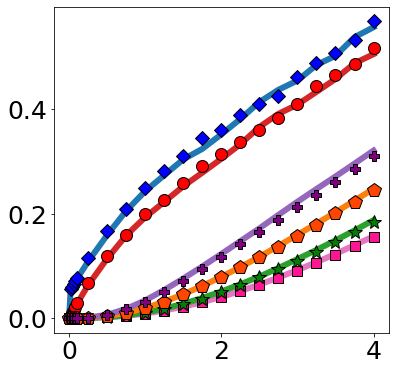

In [32]:
#######
#
#Plotting variance of full model simulations and lower dimensional model predictions
#Theory for the case with no plasticity can also be plotted by uncommenting the "oldtheory" lines
#
#######
fig = plt.figure(figsize=(6, 6))
# plt.plot(axis1/100,oldtheoryE,color='black',alpha=0.5)
# plt.plot(axis1/100,oldtheoryI,'-.',color='black',alpha=0.5)
plt.plot(axis1/100,predE,color='tab:red')
plt.plot(axis1/100,predI,color='tab:blue')
plt.plot(axis1/100,simE,'o',color='red',ms=12, markeredgewidth=1, markeredgecolor='k')
plt.plot(axis1/100,simI,'D',color='blue',ms=10, markeredgewidth=1, markeredgecolor='k')

plt.plot(axis1/100,predQE,color='tab:pink')
plt.plot(axis1/100,predQI,color='tab:green')
plt.plot(axis1/100,simQE,'s',color='deeppink',ms=10, markeredgewidth=1, markeredgecolor='k')
plt.plot(axis1/100,simQI,'*',color='green',ms=15,markeredgewidth=1, markeredgecolor='k')

plt.plot(axis1/100,predRE,color='tab:orange')
plt.plot(axis1/100,predRI,color='tab:purple')
plt.plot(axis1/100,simRE,'p',color='orangered',ms=14,markeredgewidth=1, markeredgecolor='k')
plt.plot(axis1/100,simRI,'P',color='purple',ms=10,markeredgewidth=1, markeredgecolor='k')

## A sample of histograms of the center of masses.
When figure 3 was created, the distplot funciton in seaborn was utilized to create the plots. This function has since been deprecated and below is the new code to be utilized in creating histograms.

In [33]:
filename="sample_sims"
path=""
centsimE=np.loadtxt(path+"CE"+filename+".txt",delimiter = ',')[:,-1]
centsimI=np.loadtxt(path+"CI"+filename+".txt",delimiter = ',')[:,-1]
centsimQE=np.loadtxt(path+"CQE"+filename+".txt",delimiter = ',')[:,-1]
centsimQI=np.loadtxt(path+"CQI"+filename+".txt",delimiter = ',')[:,-1]
centsimRE=np.loadtxt(path+"CRE"+filename+".txt",delimiter = ',')[:,-1]
centsimRI=np.loadtxt(path+"CRI"+filename+".txt",delimiter = ',')[:,-1]


In [34]:
def plot_normal(mean, std, color='black'):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = np.exp(-0.5*(x-mean)**2/(std**2))/(std*np.sqrt(2*np.pi))
    z = plt.plot(x, p, color, linewidth=2)

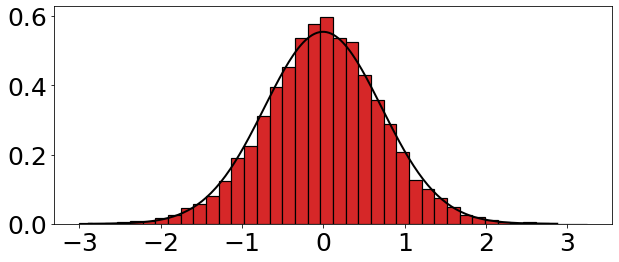

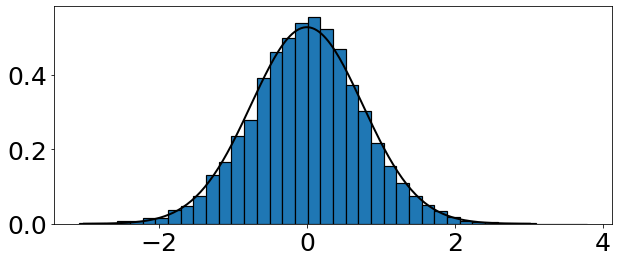

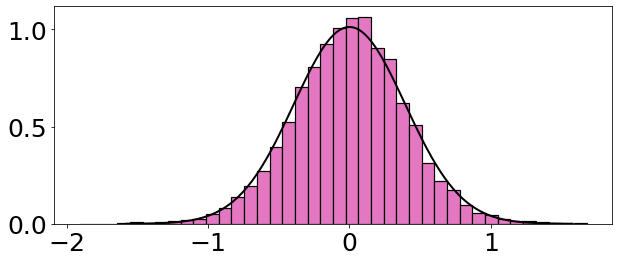

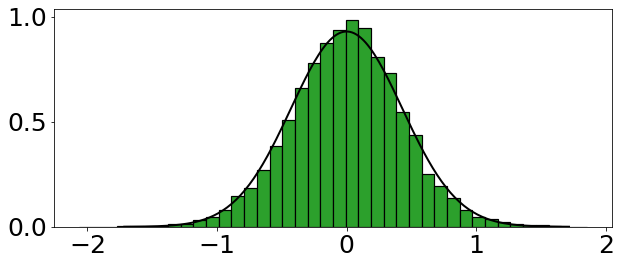

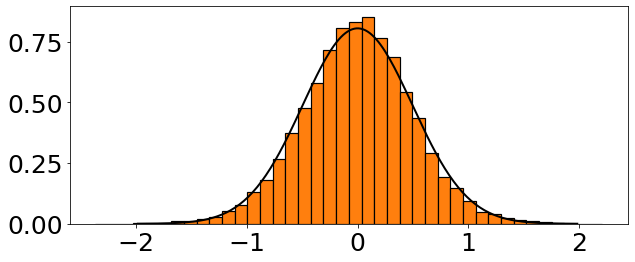

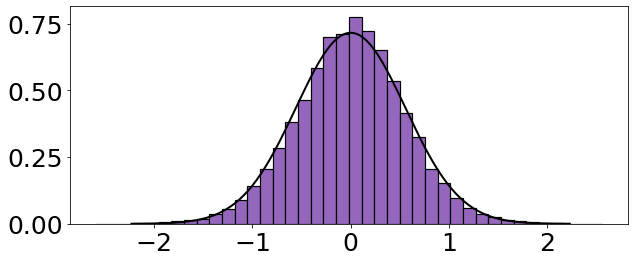

In [35]:
#######
#
#Plotting histograms of the full model simulations
#
#######
fig = plt.figure(figsize=(10, 4))
plt.hist(centsimE,bins=40,color='tab:red', edgecolor='black', linewidth=1.2,density=True)
plot_normal(np.mean(centsimE), np.std(centsimE))


fig = plt.figure(figsize=(10, 4))
plt.hist(centsimI,bins=40,color='tab:blue', edgecolor='black', linewidth=1.2,density=True)
plot_normal(np.mean(centsimI), np.std(centsimI))


fig = plt.figure(figsize=(10, 4))
plt.hist(centsimQE,bins=40,color='tab:pink', edgecolor='black', linewidth=1.2,density=True)
plot_normal(np.mean(centsimQE), np.std(centsimQE))


fig = plt.figure(figsize=(10, 4))
plt.hist(centsimQI,bins=40,color='tab:green', edgecolor='black', linewidth=1.2,density=True)
plot_normal(np.mean(centsimQI), np.std(centsimQI))


fig = plt.figure(figsize=(10, 4))
plt.hist(centsimRE,bins=40,color='tab:orange', edgecolor='black', linewidth=1.2,density=True)
plot_normal(np.mean(centsimRE), np.std(centsimRE))


fig = plt.figure(figsize=(10, 4))
plt.hist(centsimRI,bins=40,color='tab:purple', edgecolor='black', linewidth=1.2,density=True)
plot_normal(np.mean(centsimRI), np.std(centsimRI))

# Long-time Diffusion coefficient

Reproduces the lower left panel of fig 9.

In [36]:
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 200,
    'tau_re': 150,
    'tau_ri': 100,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 0,
    'qi0': 0,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.003,
    'alpha_i': 0.1
}


dx=0.005                   
x=np.arange(-10,10+dx,dx)
xdim=len(x)


th_e=0.4
th_i=0.4
eps=0.001 #noise parameter. If zero then there is no noise.

T=2000 #end time of 20 seconds


In [37]:
#initializing solution matrices
space=100
axis1=np.linspace(0,0.6,space)
axis2=np.linspace(0,0.6,space)
DCmatE=np.ones((space,space))
DCmatI=np.ones((space,space))
DCmatQE=np.ones((space,space))
DCmatQI=np.ones((space,space))
DCmatRE=np.ones((space,space))
DCmatRI=np.ones((space,space))

for i, th_e in enumerate(tqdm(axis1)):
    for k, th_i in enumerate(axis2):
        InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)

        if (not np.isnan(InitialProfiles['ae'])) and (not np.isnan(InitialProfiles['ae'])):
            for Signs in possible_signs:
                EC1=np.real(stpfun.Eigenvals('values',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
                yn=stpfun.isStable(EC1)
                if yn==1:
                    break
            if yn!=1:
                PlasticParams['qe0']=0
                PlasticParams['alpha_e']=0
                PlasticParams['qi0']=0
                PlasticParams['alpha_i']=0
                InitialProfiles2=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)
                if (not np.isnan(InitialProfiles2['ae'])) and (not np.isnan(InitialProfiles2['ai'])):
                    InitialProfiles['ae']=InitialProfiles2['ae']
                    InitialProfiles['ai']=InitialProfiles2['ai']
                PlasticParams['qe0']=0
                PlasticParams['alpha_e']=0.003
                PlasticParams['qi0']=0
                PlasticParams['alpha_i']=0.1
                Result=stpfun.Diff_coeff_Plastic(x,eps,th_e,th_i,T,**FixedParams,**PlasticParams,**InitialProfiles)
                DCmatE[i,k],DCmatI[i,k],DCmatQE[i,k],DCmatQI[i,k],DCmatRE[i,k],DCmatRI[i,k]=Result
            else:
                DCmatE[i,k],DCmatI[i,k]=np.nan,np.nan
                DCmatQE[i,k],DCmatQI[i,k]=np.nan,np.nan
                DCmatRE[i,k],DCmatRI[i,k]=np.nan,np.nan
        else:
            DCmatE[i,k],DCmatI[i,k]=np.nan,np.nan
            DCmatQE[i,k],DCmatQI[i,k]=np.nan,np.nan
            DCmatRE[i,k],DCmatRI[i,k]=np.nan,np.nan       

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Inhibitory Depression population')

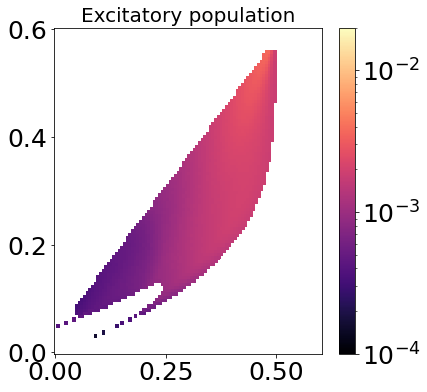

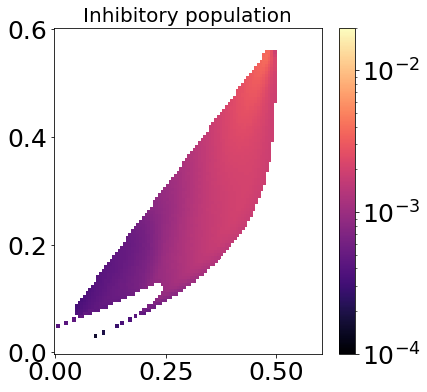

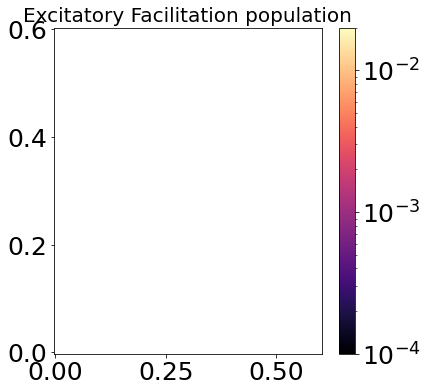

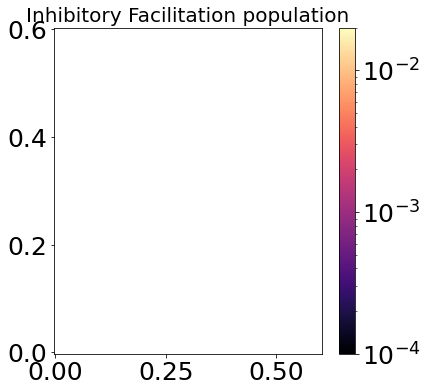

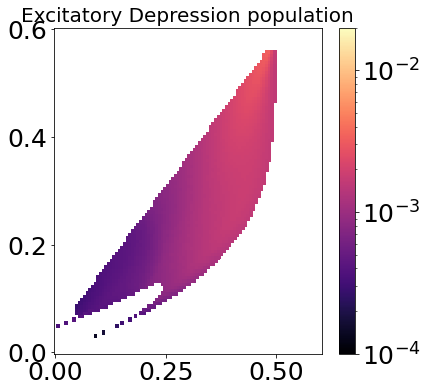

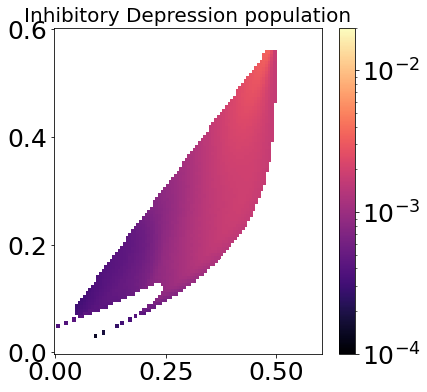

In [38]:
#######
#
#Plotting long time diffusion coefficients in one slice of parameter space
#empty plots arise for when different types of plasticity are turned off
#
#######
X, Y = np.meshgrid(axis1, axis2, indexing='ij')
normLog = mpl.colors.LogNorm(vmin=0.0001, vmax=0.02)

fig = plt.figure(figsize=(6, 6))
plt.pcolormesh(X,Y,DCmatE,cmap='magma',norm=normLog,shading='auto')
plt.colorbar()
plt.title('Excitatory population')

fig = plt.figure(figsize=(6, 6))
plt.pcolormesh(X,Y,DCmatI,cmap='magma',norm=normLog,shading='auto')
plt.colorbar()
plt.title('Inhibitory population')

fig = plt.figure(figsize=(6, 6))
plt.pcolormesh(X,Y,DCmatQE,cmap='magma',norm=normLog,shading='auto')
plt.colorbar()
plt.title('Excitatory Facilitation population')

fig = plt.figure(figsize=(6, 6))
plt.pcolormesh(X,Y,DCmatQI,cmap='magma',norm=normLog,shading='auto')
plt.colorbar()
plt.title('Inhibitory Facilitation population')

fig = plt.figure(figsize=(6, 6))
plt.pcolormesh(X,Y,DCmatRE,cmap='magma',norm=normLog,shading='auto')
plt.colorbar()
plt.title('Excitatory Depression population')

fig = plt.figure(figsize=(6, 6))
plt.pcolormesh(X,Y,DCmatRI,cmap='magma',norm=normLog,shading='auto')
plt.colorbar()
plt.title('Inhibitory Depression population')